In [19]:
#import all dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

# Read in csvs
ride_df = pd.read_csv('Rides_Data_Clean_Bounded.csv')
crime_data = pd.read_csv("Crime_Reports_Clean.csv")
crime_data = crime_data.drop ('Unnamed: 0', 1)

# Output File (CSV)
output_data_file = "output_data\cities.csv"

In [2]:
#Convert date to datetime object for ride share data
ride_df["created_date"]=pd.to_datetime(ride_df["created_date"], utc=True)
ride_df['month'] = ride_df['created_date'].dt.month
ride_df.sort_values(by=['month'])

#Convert date to datetime object for crime data
crime_data["Date"]=pd.to_datetime(crime_data["Date"], utc=True)
crime_data['Month'] = crime_data['Date'].dt.month
crime_data.sort_values(by=['Month'])

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Address,Zip Code,Latitude,Longitude,Location,Date,Month
1800,DWI,01/13/2017 02:27:00 AM,01/13/2017,227.0,3300 REDBUD TRL,78746.0,30.291694,-97.787769,"(30.29169436, -97.78776893)",2017-01-13 02:27:00+00:00,1
1636,PUBLIC INTOXICATION,01/21/2017 05:15:00 AM,01/21/2017,515.0,4807 SHOAL CREEK BLVD,78756.0,30.321322,-97.744138,"(30.32132164, -97.74413813)",2017-01-21 05:15:00+00:00,1
1635,DWI,01/21/2017 05:27:00 AM,01/21/2017,527.0,8800 PARKFIELD DR,78758.0,30.361630,-97.710683,"(30.36163032, -97.71068345)",2017-01-21 05:27:00+00:00,1
1634,DWI,01/21/2017 10:34:00 AM,01/21/2017,1034.0,MONTOPOLIS DR / E BEN WHITE BLVD SVRD WB,78741.0,30.212684,-97.712102,"(30.21268351, -97.7121022)",2017-01-21 10:34:00+00:00,1
1633,DWI .15 BAC OR ABOVE,01/21/2017 05:35:00 PM,01/21/2017,1735.0,RESEARCH BLVD SVRD SB / DUVAL RD,78759.0,30.418996,-97.747335,"(30.41899601, -97.74733464)",2017-01-21 17:35:00+00:00,1
1632,PUBLIC INTOXICATION,01/21/2017 07:25:00 PM,01/21/2017,1925.0,6615 BERKMAN DR,78723.0,30.319554,-97.688805,"(30.31955408, -97.6888048)",2017-01-21 19:25:00+00:00,1
1631,DWI 2ND,01/21/2017 11:41:00 PM,01/21/2017,2341.0,E ANDERSON LN SVRD EB / CAMERON RD,78752.0,30.332221,-97.686628,"(30.33222141, -97.68662811)",2017-01-21 23:41:00+00:00,1
1630,PUBLIC INTOXICATION,01/21/2017 11:45:00 PM,01/21/2017,2345.0,E 6TH ST / NECHES ST,78701.0,30.266782,-97.738253,"(30.26678161, -97.73825313)",2017-01-21 23:45:00+00:00,1
1629,DRIVING WHILE INTOX / FELONY,01/21/2017 11:48:00 PM,01/21/2017,2348.0,5600 PECAN BROOK DR,78724.0,30.313141,-97.652674,"(30.3131406, -97.65267398)",2017-01-21 23:48:00+00:00,1
1628,PUBLIC INTOXICATION,01/22/2017 12:40:00 AM,01/22/2017,40.0,309 E 6TH ST,78701.0,30.267083,-97.740105,"(30.26708313, -97.74010493)",2017-01-22 00:40:00+00:00,1


In [3]:
#Create new dataframe for mapping for ride share data
new_df=pd.DataFrame(ride_df.groupby(['month'])['month'].count())
new_df.rename(columns= {"month": 'Months', 
                        'month':"Number of Rides"}, 
                                 inplace = True) 
new_df.index.names = ['index']
months = ["Jan", "Feb", "March", "April", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"] 
new_df["Months"]=months
new_df = new_df.reindex([6,7,8,9,10,11,12,1,2,3,4])

#Create new dataframe for mapping for ride share data
newcrime_df=pd.DataFrame(crime_data.groupby(['Month'])['Month'].count())
newcrime_df.rename(columns= {"Month": 'Months', 
                        "Month":"Number of Occurrences"}, 
                                 inplace = True) 
newcrime_df.index.names = ['index']
Months = ["Jan", "Feb", "March", "April", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"] 
newcrime_df["Month"]= Months
newcrime_df = newcrime_df.reindex([6,7,8,9,10,11,12,1,2,3,4,])

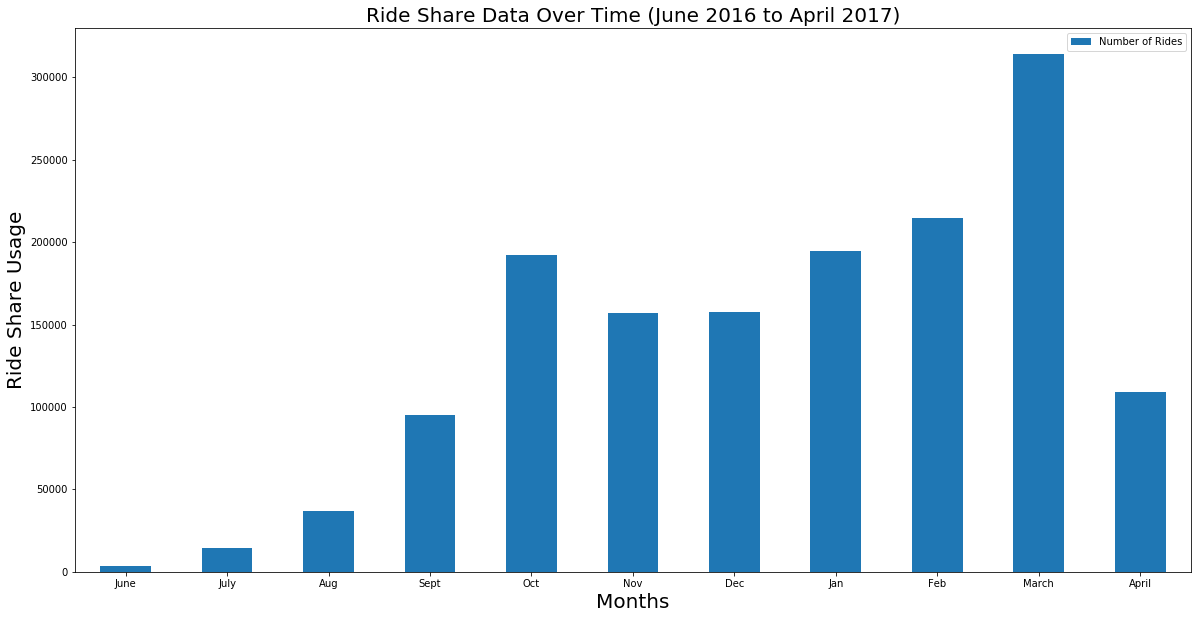

In [15]:
#Plot Rideshare data over time
plt = new_df.plot.bar(x='Months', y='Number of Rides', rot=0, figsize=(20,10))
plt.set_xlabel("Months", fontsize=20)
plt.set_ylabel("Ride Share Usage", fontsize=20)
plt.set_title("Ride Share Data Over Time (June 2016 to April 2017)", fontsize=20)


# Save the figure
plt.figure.savefig("ride_share_over_time.png")

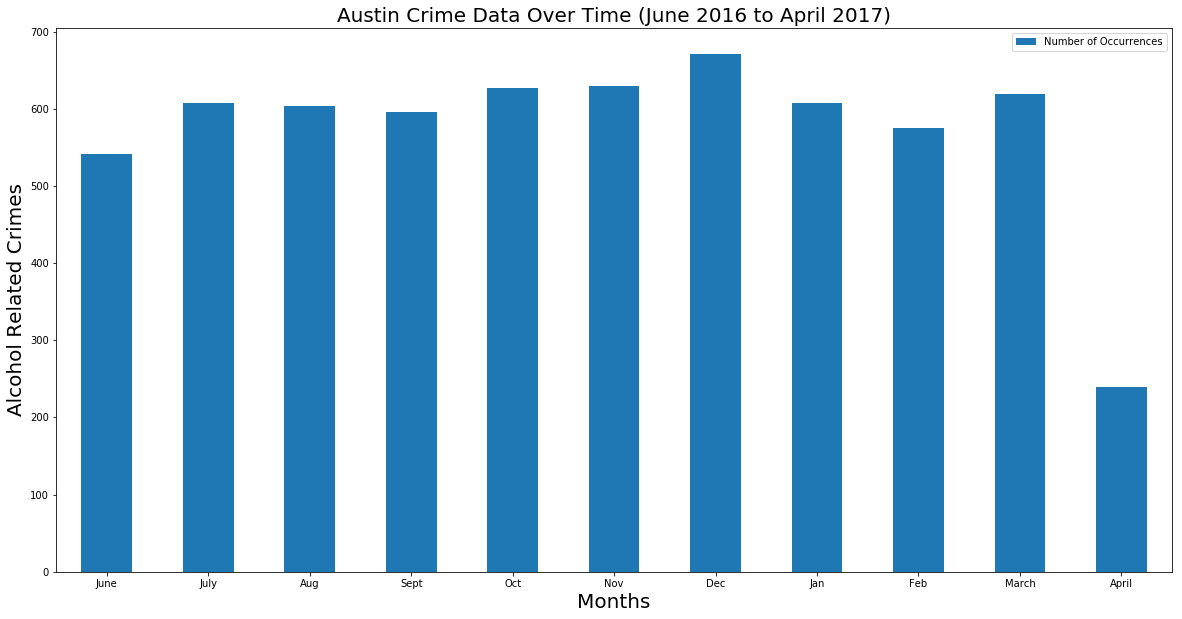

In [17]:
#Plot Crime data over time
ax = newcrime_df.plot.bar(x='Month', y='Number of Occurrences', rot=0, figsize=(20,10))
ax.set_xlabel("Months", fontsize=20)
ax.set_ylabel("Alcohol Related Crimes", fontsize=20)
ax.set_title("Austin Crime Data Over Time (June 2016 to April 2017)", fontsize=20)

# Save the figure
ax.figure.savefig("crime_over_time.png")

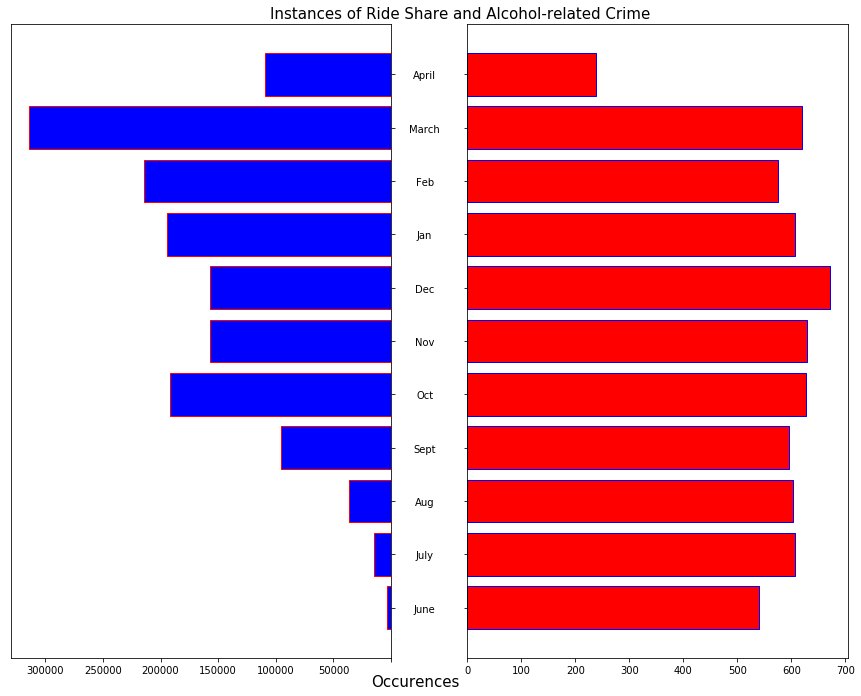

In [21]:
# Initial data for a dual visualization
label = ['June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'March', 'April']
data1 = new_df['Number of Rides']
data2 = newcrime_df['Number of Occurrences']
data1_minus = np.array(data1)*-1

gs = gridspec.GridSpec(1, 2, top=.95, bottom=0.07)
fig = plt.figure(figsize=(15, 10))
pos = np.arange(11)

# adding left bar chart
ax1 = fig.add_subplot(gs[0])
ax1.barh(pos, data1_minus, align='center', color=('blue'), edgecolor='red')


# set tick positions and labels appropriately
ax1.yaxis.tick_right()
ax1.set_yticks(pos)
ax1.set_yticklabels(label, ha='center')
ax1.tick_params(axis='y', pad=30)

# adding right bar chart
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.barh(pos, data2, align='center', color=('red'), edgecolor='blue')

# turn off the second axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in ax2.get_yticklabels()]

ax1.set_xlabel('Occurences', ha='right', fontsize = 15)
ax1.xaxis.set_label_coords(1.18, -.025)
ax1.set_ylabel('', rotation=0, ha='right', fontsize = 15)
ax1.set_title('Instances of Ride Share and Alcohol-related Crime', x=1.18, fontsize = 15)

#Manually reset labels for the left side
group_labels = ['400000','300000','250000','200000','150000','100000','50000']
ax1.set_xticklabels(group_labels)

# Save the figure
ax1.figure.savefig("ride_and_crime_chart")
plt.show()